In [75]:
from Bio.PDB import PDBParser, PDBIO
from Bio.PDB.Structure import Structure as BStructure
from Bio.PDB.Model import Model as BModel
from Bio.PDB.Chain import Chain as BChain
from Bio.PDB.Residue import Residue as BResidue
from Bio.PDB.Atom import Atom as BAtom

In [76]:
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from multiprocessing import Pool
from tqdm import tqdm

from utils import *

import sys
sys.path.append("./data/")
from dataset import *

# dataset

In [77]:
from torch.utils.data import DataLoader
dataset = MyDataset(file_path="D:/NTU/MSAI_Project/SAbDab_mean/test.pkl", need_preprocess=False)
print(len(dataset))

need_preprocess:  False
356


In [78]:
item = dataset.data[0]
hc, lc = item.get_heavy_chain(), item.get_light_chain()

In [79]:
item.cdr_pos

{'CDR-H1': (25, 32),
 'CDR-H2': (50, 56),
 'CDR-H3': (95, 106),
 'CDR-L1': (26, 37),
 'CDR-L2': (55, 57),
 'CDR-L3': (94, 101)}

In [80]:
item.get_cdr_pos("H1"), item.get_cdr_pos("L3")

((25, 32), (94, 101))

In [81]:
hc.get_seq()

'QVQLKESGPGLVAPSQSLSITCTVSGFPLTAYGVNWVRQPPGKGLEWLGMIWGDGNTDYNSALKSRLSISKDNSKSQVFLKMNSLQTDDTARYYCARDPYGSKPMDYWGQGTSVTVSS'

In [82]:
lc.get_seq()

'DIVMSQSPSSLVVSVGEKVTMSCKSSQSLLYSSNQKNFLAWYQQKPGQSPKLLIYWASTRESGVPDRFTGSGSGTDFTLTISSVKAEDLAVYYCQQYFRYRTFGGGTKLEIKRA'

In [83]:
test_loader = DataLoader(dataset, batch_size=2, collate_fn=dataset.collate_fn)
cnt = 0
for batch in test_loader:
#     print(batch)
    cnt += 1
    
    if cnt==1:
        break

In [84]:
batch["X"]

tensor([[[[   0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000],
          [   0.0000,    0.0000,    0.0000]],

         [[  10.9640,  -99.8570,  -34.4260],
          [  10.9750, -101.2780,  -34.7690],
          [  12.0960, -101.9410,  -34.0060],
          [  12.8360, -102.6870,  -34.6320]],

         [[  12.2960, -101.6130,  -32.7000],
          [  13.4270, -102.1140,  -31.8940],
          [  13.4230, -103.6260,  -31.7060],
          [  12.4760, -104.1790,  -31.1550]],

         ...,

         [[  19.4390,  -87.4680,  -27.3050],
          [  18.9020,  -86.5260,  -26.3340],
          [  18.4200,  -87.3090,  -25.1440],
          [  17.5600,  -88.1880,  -25.2960]],

         [[  22.4760,  -88.8410,  -28.8500],
          [  21.1220,  -88.9230,  -28.3240],
          [  20.7260,  -87.8340,  -27.3290],
          [  21.5670,  -87.3420,  -26.5880]],

         [[  26.3030,  -89.0430,  -26.7520],
          [  26.5050,  -90.107

In [85]:
batch["S"]

tensor([[ 3, 19,  8, 19,  9, 18, 17, 22,  6, 25,  6,  9,  8,  7, 25, 22, 19, 22,
          9, 22, 10, 23, 24, 23,  8, 22,  6, 11, 25,  9, 23,  7, 13,  6,  8, 16,
         12,  8, 21, 19, 25, 25,  6, 18,  6,  9, 17, 12,  9,  6, 20, 10, 12,  6,
         14,  6, 16, 23, 14, 13, 16, 22,  7,  9, 18, 22, 21,  9, 22, 10, 22, 18,
         14, 16, 22, 18, 22, 19,  8, 11,  9, 18, 20, 16, 22,  9, 19, 23, 14, 14,
         23,  7, 21, 13, 13, 24,  7, 21, 14, 25, 13,  6, 22, 18, 25, 20, 14, 13,
         12,  6, 19,  6, 23, 22,  8, 23,  8, 22, 22,  4, 14, 10,  8, 20, 22, 19,
         22, 25, 22, 22,  9,  8,  8, 22,  8,  6, 17, 18,  8, 23, 20, 22, 24, 18,
         22, 22, 19, 22,  9,  9, 13, 22, 22, 16, 19, 18, 16, 11,  9,  7, 12, 13,
         19, 19, 18, 25,  6, 19, 22, 25, 18,  9,  9, 10, 13, 12,  7, 22, 23, 21,
         17, 22,  6,  8, 25, 14, 21, 11, 23,  6, 22,  6, 22,  6, 23, 14, 11, 23,
          9, 23, 10, 22, 22,  8, 18,  7, 17, 14,  9,  7,  8, 13, 13, 24, 19, 19,
         13, 11, 21, 13, 21,

In [86]:
s = " ".join(list(map(str, list(batch["S"][0].numpy()))))
s

'3 19 8 19 9 18 17 22 6 25 6 9 8 7 25 22 19 22 9 22 10 23 24 23 8 22 6 11 25 9 23 7 13 6 8 16 12 8 21 19 25 25 6 18 6 9 17 12 9 6 20 10 12 6 14 6 16 23 14 13 16 22 7 9 18 22 21 9 22 10 22 18 14 16 22 18 22 19 8 11 9 18 20 16 22 9 19 23 14 14 23 7 21 13 13 24 7 21 14 25 13 6 22 18 25 20 14 13 12 6 19 6 23 22 8 23 8 22 22 4 14 10 8 20 22 19 22 25 22 22 9 8 8 22 8 6 17 18 8 23 20 22 24 18 22 22 19 22 9 9 13 22 22 16 19 18 16 11 9 7 12 13 19 19 18 25 6 19 22 25 18 9 9 10 13 12 7 22 23 21 17 22 6 8 25 14 21 11 23 6 22 6 22 6 23 14 11 23 9 23 10 22 22 8 18 7 17 14 9 7 8 13 13 24 19 19 13 11 21 13 21 23 11 6 6 6 23 18 9 17 10 18 21 7 2 22 12 19 25 19 24 9 13 11 16 21 24 16 8 6 24 10 15 16 16 18 24 10 21 18 14 11 23 25 15 14 14 13 13 25 25 24 25 24 23 17 17 22 15 8 24 21 14'

In [87]:
s[:s.find(" 4 ")]

'3 19 8 19 9 18 17 22 6 25 6 9 8 7 25 22 19 22 9 22 10 23 24 23 8 22 6 11 25 9 23 7 13 6 8 16 12 8 21 19 25 25 6 18 6 9 17 12 9 6 20 10 12 6 14 6 16 23 14 13 16 22 7 9 18 22 21 9 22 10 22 18 14 16 22 18 22 19 8 11 9 18 20 16 22 9 19 23 14 14 23 7 21 13 13 24 7 21 14 25 13 6 22 18 25 20 14 13 12 6 19 6 23 22 8 23 8 22 22'

In [88]:
s[s.find(" 4 "):s.find(" 2 ")]

' 4 14 10 8 20 22 19 22 25 22 22 9 8 8 22 8 6 17 18 8 23 20 22 24 18 22 22 19 22 9 9 13 22 22 16 19 18 16 11 9 7 12 13 19 19 18 25 6 19 22 25 18 9 9 10 13 12 7 22 23 21 17 22 6 8 25 14 21 11 23 6 22 6 22 6 23 14 11 23 9 23 10 22 22 8 18 7 17 14 9 7 8 13 13 24 19 19 13 11 21 13 21 23 11 6 6 6 23 18 9 17 10 18 21 7'

In [89]:
s[s.find(" 2 "):]

' 2 22 12 19 25 19 24 9 13 11 16 21 24 16 8 6 24 10 15 16 16 18 24 10 21 18 14 11 23 25 15 14 14 13 13 25 25 24 25 24 23 17 17 22 15 8 24 21 14'

In [90]:
batch["L"]

['0000000000000000000000000011111111000000000000000002222222000000000000000000000000000000000000003333333333330000000000000000000000000000000000000044444444444400000000000000000555000000000000000000000000000000000000666666660000000000000000000000000000000000000000000000000000000000000',
 '000000000000000000000000111111110000000000000000022222222000000000000000000000000000000000000003333333000000000000000000000000000000000000000444444444440000000000000000055500000000000000000000000000000000000066666666600000000000000000000000']

In [91]:
batch["mask"]

tensor([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [92]:
batch["X"].shape, batch["S"].shape, len(batch["L"]), batch["mask"].shape

(torch.Size([2, 283, 4, 3]), torch.Size([2, 283]), 2, torch.Size([2, 283]))

X - positions: batch里有1个样本，有283个AA，每个AA的N/CA/C/O坐标为4x3的矩阵

S - sequences: batch里有1个样本，有283个AA

L - CDR masks: 0表示非CDR，1表示CDR1，2表示CDR2，3表示CDR3

mask - coordinate masks: 0表示该AA没有坐标数据，1表示正常

In [93]:
batch["X"][0][3]

tensor([[  14.4920, -104.2920,  -32.1610],
        [  14.6480, -105.7450,  -32.0540],
        [  16.0610, -106.1400,  -31.7090],
        [  17.0230, -105.4850,  -32.1180]])

In [94]:
batch["X"].shape

torch.Size([2, 283, 4, 3])

In [95]:
batch["S"].shape

torch.Size([2, 283])

In [96]:
len(batch["L"][0])

283

# model

In [97]:
class ProteinFeature(nn.Module):

    def __init__(self):
        super().__init__()
        # global nodes and mask nodes
        self.boa_idx = VOCAB.symbol_to_idx(VOCAB.BOA)
        self.boh_idx = VOCAB.symbol_to_idx(VOCAB.BOH)
        self.bol_idx = VOCAB.symbol_to_idx(VOCAB.BOL)

        # segment ids
        self.ag_seg_id, self.hc_seg_id, self.lc_seg_id = 1, 2, 3

    def _is_global(self, S):
        return sequential_or(S == self.boa_idx, S == self.boh_idx, S == self.bol_idx)  # [N]

    def _construct_segment_ids(self, S):
        # construct segment ids. 1/2/3 for antigen/heavy chain/light chain
        glbl_node_mask = self._is_global(S)
        glbl_nodes = S[glbl_node_mask]
        boa_mask, boh_mask, bol_mask = (glbl_nodes == self.boa_idx), (glbl_nodes == self.boh_idx), (glbl_nodes == self.bol_idx)
        glbl_nodes[boa_mask], glbl_nodes[boh_mask], glbl_nodes[bol_mask] = self.ag_seg_id, self.hc_seg_id, self.lc_seg_id
        segment_ids = torch.zeros_like(S)
        segment_ids[glbl_node_mask] = glbl_nodes - F.pad(glbl_nodes[:-1], (1, 0), value=0)
        segment_ids = torch.cumsum(segment_ids, dim=0)
        return segment_ids

    @torch.no_grad()
    def construct_edges(self, X, S, batch_id, segment_ids=None):
        '''
        Memory efficient with complexity of O(Nn) where n is the largest number of nodes in the batch
        '''
        # construct tensors to map between global / local node index
        lengths = scatter_sum(torch.ones_like(batch_id), batch_id)  # [bs]
        N, max_n = batch_id.shape[0], torch.max(lengths)
        offsets = F.pad(torch.cumsum(lengths, dim=0)[:-1], pad=(1, 0), value=0)  # [bs]
        # global node index to local index. lni2gni can be implemented as lni + offsets[batch_id]
        gni = torch.arange(N, device=batch_id.device)
        gni2lni = gni - offsets[batch_id]  # [N]

        # prepare inputs
        if segment_ids is None:
            segment_ids = self._construct_segment_ids(S)

        ctx_edges, inter_edges = [], []

        # all possible edges (within the same graph)
        # same bid (get rid of self-loop and none edges)
        same_bid = torch.zeros(N, max_n, device=batch_id.device)
        same_bid[(gni, lengths[batch_id] - 1)] = 1
        same_bid = 1 - torch.cumsum(same_bid, dim=-1)
        # shift right and pad 1 to the left
        same_bid = F.pad(same_bid[:, :-1], pad=(1, 0), value=1)
        same_bid[(gni, gni2lni)] = 0  # delete self loop
        row, col = torch.nonzero(same_bid).T  # [2, n_edge_all]
        col = col + offsets[batch_id[row]]  # mapping from local to global node index
        
        # not global edges
        is_global = sequential_or(S == self.boa_idx, S == self.boh_idx, S == self.bol_idx) # [N]
        row_global, col_global = is_global[row], is_global[col]
        not_global_edges = torch.logical_not(torch.logical_or(row_global, col_global))

        # all possible ctx edges: same seg, not global
        row_seg, col_seg = segment_ids[row], segment_ids[col]
        select_edges = torch.logical_and(row_seg == col_seg, not_global_edges)
        ctx_all_row, ctx_all_col = row[select_edges], col[select_edges]
        # ctx edges
        ctx_edges = _radial_edges(X, torch.stack([ctx_all_row, ctx_all_col]).T, cutoff=8.0)

        # all possible inter edges: not same seg, not global
        select_edges = torch.logical_and(row_seg != col_seg, not_global_edges)
        inter_all_row, inter_all_col = row[select_edges], col[select_edges]
        inter_edges = _radial_edges(X, torch.stack([inter_all_row, inter_all_col]).T, cutoff=12.0)

        # edges between global and normal nodes
        select_edges = torch.logical_and(row_seg == col_seg, torch.logical_not(not_global_edges))
        global_normal = torch.stack([row[select_edges], col[select_edges]])  # [2, nE]
        # edges between global and global nodes
        select_edges = torch.logical_and(row_global, col_global) # self-loop has been deleted
        global_global = torch.stack([row[select_edges], col[select_edges]])  # [2, nE]

        # add additional edge to neighbors in 1D sequence (except epitope)
        select_edges = sequential_and(
            torch.logical_or((row - col) == 1, (row - col) == -1),  # adjacent in the graph
            not_global_edges,  # not global edges (also ensure the edges are in the same segment)
            row_seg != self.ag_seg_id  # not epitope
        )
        seq_adj = torch.stack([row[select_edges], col[select_edges]])  # [2, nE]

        # finally construct context edges
        space_edge_num = ctx_edges.shape[1] + global_normal.shape[1] + global_global.shape[1]
        ctx_edges = torch.cat([ctx_edges, global_normal, global_global, seq_adj], dim=1)  # [2, E]
        ctx_edge_feats = torch.cat(
            [torch.zeros(space_edge_num, dtype=torch.float, device=X.device), 
             torch.ones(seq_adj.shape[1], dtype=torch.float, device=X.device)], dim=0).unsqueeze(-1)

        return ctx_edges, inter_edges, ctx_edge_feats

    def forward(self, X, S, offsets):
        batch_id = torch.zeros_like(S)
        batch_id[offsets[1:-1]] = 1
        batch_id.cumsum_(dim=0)

        return self.construct_edges(X, S, batch_id)


def _radial_edges(X, src_dst, cutoff):
    dist = X[:, 1][src_dst]  # [Ef, 2, 3], CA position
    dist = torch.norm(dist[:, 0] - dist[:, 1], dim=-1) # [Ef]
    src_dst = src_dst[dist <= cutoff]
    src_dst = src_dst.transpose(0, 1)  # [2, Ef]
    return src_dst

In [98]:
class MC_Att_L(nn.Module):
    """
    Multi-Channel Attention Layer
    """
    def __init__(self, input_nf, output_nf, hidden_nf, n_channel, edges_in_d=0,
                 act_fn=nn.SiLU(), dropout=0.1):
        super().__init__()
        self.hidden_nf = hidden_nf

        self.dropout = nn.Dropout(dropout)

        self.linear_q = nn.Linear(input_nf, hidden_nf)
        self.linear_kv = nn.Linear(input_nf + n_channel ** 2 + edges_in_d, hidden_nf * 2)  # parallel calculate kv

        layer = nn.Linear(hidden_nf, n_channel, bias=False)
        torch.nn.init.xavier_uniform_(layer.weight, gain=0.001)

        coord_mlp = []
        coord_mlp.append(nn.Linear(hidden_nf, hidden_nf))
        coord_mlp.append(act_fn)
        coord_mlp.append(layer)
        self.coord_mlp = nn.Sequential(*coord_mlp)

    def att_model(self, h, edge_index, radial, edge_attr):
        '''
        :param h: [bs * n_node, input_size]
        :param edge_index: list of [n_edge], [n_edge]
        :param radial: [n_edge, n_channel, n_channel]
        :param edge_attr: [n_edge, edge_dim]
        '''
        row, col = edge_index
        source, target = h[row], h[col]  # [n_edge, input_size]

        # qkv
        q = self.linear_q(source)  # [n_edge, hidden_size]
        n_channel = radial.shape[1]
        radial = radial.reshape(radial.shape[0], n_channel * n_channel)  # [n_edge, n_channel ^ 2]
        if edge_attr is not None:
            target_feat = torch.cat([radial, target, edge_attr], dim=1)
        else:
            target_feat = torch.cat([radial, target], dim=1)
        kv = self.linear_kv(target_feat)  # [n_edge, hidden_size * 2]
        k, v = kv[..., 0::2], kv[..., 1::2]  # [n_edge, hidden_size]

        # attention weight
        alpha = torch.sum(q * k, dim=1)  # [n_edge]

        print_log(f'alpha1, {torch.isnan(alpha).sum()}', level='DEBUG')

        # alpha = scatter_softmax(alpha, row, h.shape[0]) # [n_edge]
        alpha = scatter_softmax(alpha, row) # [n_edge]

        print_log(f'alpha2, {torch.isnan(alpha).sum()}', level='DEBUG')

        return alpha, v
        
    def node_model(self, h, edge_index, att_weight, v):
        '''
        :param h: [bs * n_node, input_size]
        :param edge_index: list of [n_edge], [n_edge]
        :param att_weight: [n_edge, 1], unsqueezed before passed in
        :param v: [n_edge, hidden_size]
        '''
        row, _ = edge_index
        agg = unsorted_segment_sum(att_weight * v, row, h.shape[0])  # [bs * n_node, hidden_size]
        agg = self.dropout(agg)
        return h + agg  # residual

    def coord_model(self, coord, edge_index, coord_diff, att_weight, v):
        '''
        :param coord: [bs * n_node, n_channel, d]
        :param edge_index: list of [n_edge], [n_edge]
        :param coord_diff: [n_edge, n_channel, d]
        :param att_weight: [n_edge, 1], unsqueezed before passed in
        :param v: [n_edge, hidden_size]
        '''
        row, _ = edge_index
        coord_v = att_weight * self.coord_mlp(v)  # [n_edge, n_channel]
        trans = coord_diff * coord_v.unsqueeze(-1)
        agg = unsorted_segment_sum(trans, row, coord.size(0))
        coord = coord + agg
        return coord
    
    def forward(self, h, edge_index, coord, edge_attr=None):
        radial, coord_diff = coord2radial(edge_index, coord)

        att_weight, v = self.att_model(h, edge_index, radial, edge_attr)

        print_log(f'att_weight, {torch.isnan(att_weight).sum()}', level='DEBUG')
        print_log(f'v, {torch.isnan(v).sum()}', level='DEBUG')

        flat_att_weight = att_weight
        att_weight = att_weight.unsqueeze(-1)  # [n_edge, 1]
        h = self.node_model(h, edge_index, att_weight, v)
        coord = self.coord_model(coord, edge_index, coord_diff, att_weight, v)

        return h, coord, flat_att_weight

In [99]:
class MC_E_GCL(nn.Module):
    """
    Multi-Channel E(n) Equivariant Convolutional Layer
    """

    def __init__(self, input_nf, output_nf, hidden_nf, n_channel, edges_in_d=0, act_fn=nn.SiLU(),
                 residual=True, attention=False, normalize=False, coords_agg='mean', tanh=False,
                 dropout=0.1):
        super(MC_E_GCL, self).__init__()
        input_edge = input_nf * 2
        self.residual = residual
        self.attention = attention
        self.normalize = normalize
        self.coords_agg = coords_agg
        self.tanh = tanh
        self.epsilon = 1e-8

        self.dropout = nn.Dropout(dropout)

        self.edge_mlp = nn.Sequential(
            nn.Linear(input_edge + n_channel**2 + edges_in_d, hidden_nf),
            act_fn,
            nn.Linear(hidden_nf, hidden_nf),
            act_fn)

        self.node_mlp = nn.Sequential(
            nn.Linear(hidden_nf + input_nf, hidden_nf),
            act_fn,
            nn.Linear(hidden_nf, output_nf))

        layer = nn.Linear(hidden_nf, n_channel, bias=False)
        torch.nn.init.xavier_uniform_(layer.weight, gain=0.001)

        coord_mlp = []
        coord_mlp.append(nn.Linear(hidden_nf, hidden_nf))
        coord_mlp.append(act_fn)
        coord_mlp.append(layer)
        if self.tanh:
            coord_mlp.append(nn.Tanh())
        self.coord_mlp = nn.Sequential(*coord_mlp)

        if self.attention:
            self.att_mlp = nn.Sequential(
                nn.Linear(hidden_nf, 1),
                nn.Sigmoid())

    def edge_model(self, source, target, radial, edge_attr):
        '''
        :param source: [n_edge, input_size]
        :param target: [n_edge, input_size]
        :param radial: [n_edge, n_channel, n_channel]
        :param edge_attr: [n_edge, edge_dim]
        '''
        radial = radial.reshape(radial.shape[0], -1)  # [n_edge, n_channel ^ 2]

        if edge_attr is None:  # Unused.
            out = torch.cat([source, target, radial], dim=1)
        else:
            out = torch.cat([source, target, radial, edge_attr], dim=1)
        out = self.edge_mlp(out)
        out = self.dropout(out)

        if self.attention:
            att_val = self.att_mlp(out)
            out = out * att_val
        return out

    def node_model(self, x, edge_index, edge_attr, node_attr):
        '''
        :param x: [bs * n_node, input_size]
        :param edge_index: list of [n_edge], [n_edge]
        :param edge_attr: [n_edge, hidden_size], refers to message from i to j
        :param node_attr: [bs * n_node, node_dim]
        '''
        row, col = edge_index
        agg = unsorted_segment_sum(edge_attr, row, num_segments=x.size(0))  # [bs * n_node, hidden_size]
        print_log(f'agg1, {torch.isnan(agg).sum()}', level='DEBUG')
        if node_attr is not None:
            agg = torch.cat([x, agg, node_attr], dim=1)
        else:
            agg = torch.cat([x, agg], dim=1)  # [bs * n_node, input_size + hidden_size]
        print_log(f'agg, {torch.isnan(agg).sum()}', level='DEBUG')
        out = self.node_mlp(agg)  # [bs * n_node, output_size]
        print_log(f'out, {torch.isnan(out).sum()}', level='DEBUG')
        out = self.dropout(out)
        if self.residual:
            out = x + out
        return out, agg

    def coord_model(self, coord, edge_index, coord_diff, edge_feat):
        '''
        coord: [bs * n_node, n_channel, d]
        edge_index: list of [n_edge], [n_edge]
        coord_diff: [n_edge, n_channel, d]
        edge_feat: [n_edge, hidden_size]
        '''
        row, col = edge_index
        trans = coord_diff * self.coord_mlp(edge_feat).unsqueeze(-1)  # [n_edge, n_channel, d]

        if self.coords_agg == 'sum':
            agg = unsorted_segment_sum(trans, row, num_segments=coord.size(0))
        elif self.coords_agg == 'mean':
            agg = unsorted_segment_mean(trans, row, num_segments=coord.size(0))  # [bs * n_node, n_channel, d]
        else:
            raise Exception('Wrong coords_agg parameter' % self.coords_agg)
        coord = coord + agg
        return coord

    def forward(self, h, edge_index, coord, edge_attr=None, node_attr=None):
        '''
        h: [bs * n_node, hidden_size]
        edge_index: list of [n_row] and [n_col] where n_row == n_col (with no cutoff, n_row == bs * n_node * (n_node - 1))
        coord: [bs * n_node, n_channel, d]
        '''
        row, col = edge_index
        radial, coord_diff = coord2radial(edge_index, coord)

        edge_feat = self.edge_model(h[row], h[col], radial, edge_attr)  # [n_edge, hidden_size]
        print_log(f'edge_feat, {torch.isnan(edge_feat).sum()}', level='DEBUG')
        coord = self.coord_model(coord, edge_index, coord_diff, edge_feat)    # [bs * n_node, n_channel, d]
        h, agg = self.node_model(h, edge_index, edge_feat, node_attr)

        return h, coord

In [100]:
class MCAttEGNN(nn.Module):
    def __init__(self, in_node_nf, hidden_nf, out_node_nf, n_channel, in_edge_nf=0,
                 act_fn=nn.SiLU(), n_layers=4, residual=True, dropout=0.1, dense=False):
        super().__init__()
        '''
        :param in_node_nf: Number of features for 'h' at the input
        :param hidden_nf: Number of hidden features
        :param out_node_nf: Number of features for 'h' at the output
        :param n_channel: Number of channels of coordinates
        :param in_edge_nf: Number of features for the edge features
        :param act_fn: Non-linearity
        :param n_layers: Number of layer for the EGNN
        :param residual: Use residual connections, we recommend not changing this one
        :param dropout: probability of dropout
        :param dense: if dense, then context states will be concatenated for all layers,
                      coordination will be averaged
        '''
        self.hidden_nf = hidden_nf
        self.n_layers = n_layers

        self.dropout = nn.Dropout(dropout)

        self.linear_in = nn.Linear(in_node_nf, self.hidden_nf)

        self.dense = dense
        if dense:
            self.linear_out = nn.Linear(self.hidden_nf * (n_layers + 1), out_node_nf)
        else:
            self.linear_out = nn.Linear(self.hidden_nf, out_node_nf)

        for i in range(0, n_layers):
            self.add_module(f'gcl_{i}', MC_E_GCL(
                self.hidden_nf, self.hidden_nf, self.hidden_nf, n_channel,
                edges_in_d=in_edge_nf, act_fn=act_fn, residual=residual, dropout=dropout
            ))
            # TODO: add parameter for passing edge type to interaction layer
            self.add_module(f'att_{i}', MC_Att_L(
                self.hidden_nf, self.hidden_nf, self.hidden_nf,
                n_channel, edges_in_d=0, act_fn=act_fn, dropout=dropout
            ))
        self.out_layer = MC_E_GCL(
            self.hidden_nf, self.hidden_nf, self.hidden_nf, n_channel,
            edges_in_d=in_edge_nf, act_fn=act_fn, residual=residual
        )
    
    def forward(self, h, x, ctx_edges, att_edges, ctx_edge_attr=None, att_edge_attr=None, return_attention=False):
        h = self.linear_in(h)
        h = self.dropout(h)

        ctx_states, ctx_coords, atts = [], [], []
        for i in range(0, self.n_layers):
            h, x = self._modules[f'gcl_{i}'](h, ctx_edges, x, edge_attr=ctx_edge_attr)
            ctx_states.append(h)
            ctx_coords.append(x)
            h, x, att = self._modules[f'att_{i}'](h, att_edges, x, edge_attr=att_edge_attr)
            atts.append(att)

        h, x = self.out_layer(h, ctx_edges, x, edge_attr=ctx_edge_attr)
        ctx_states.append(h)
        ctx_coords.append(x)
        if self.dense:
            h = torch.cat(ctx_states, dim=-1)
            x = torch.mean(torch.stack(ctx_coords), dim=0)
        h = self.dropout(h)
        h = self.linear_out(h)
        if return_attention:
            return h, x, atts
        else:
            return h, x

In [101]:
class MCAttModel(nn.Module):
    def __init__(self, embed_size, hidden_size, n_channel, n_edge_feats=0,
                 n_layers=3, cdr_type='3', alpha=0.1, dropout=0.1, dense=False):
        super().__init__()
        self.num_aa_type = len(VOCAB)
        self.cdr_type = cdr_type
        self.mask_token_id = VOCAB.get_unk_idx()
        self.alpha = alpha

        self.aa_embedding = nn.Embedding(self.num_aa_type, embed_size)
        self.gnn = MCAttEGNN(embed_size, hidden_size, self.num_aa_type,
                             n_channel, n_edge_feats, n_layers=n_layers,
                             residual=True, dropout=dropout, dense=dense)
        
        self.seq_loss = nn.CrossEntropyLoss(reduction='none')
        # self.coord_loss = nn.MSELoss(reduction='sum')
        # it is the same as HuberLoss with delta=1.0
        self.coord_loss = nn.SmoothL1Loss(reduction='sum')

        # protein features
        self.protein_feature = ProteinFeature()

    def init_mask(self, X, S, cdr_range):
        '''
        set coordinates of masks following a unified distribution
        between the two ends
        '''
        X, S, cmask = X.clone(), S.clone(), torch.zeros_like(X, device=X.device)
        n_channel, n_dim = X.shape[1:]
        for start, end in cdr_range:
            S[start:end + 1] = self.mask_token_id
            l_coord, r_coord = X[start - 1], X[end + 1]  # [n_channel, 3]
            n_span = end - start + 2
            coord_offsets = (r_coord - l_coord).unsqueeze(0).expand(n_span - 1, n_channel, n_dim)  # [n_mask, n_channel, 3]
            coord_offsets = torch.cumsum(coord_offsets, dim=0)
            mask_coords = l_coord + coord_offsets / n_span
            X[start:end + 1] = mask_coords
            cmask[start:end + 1, ...] = 1
        return X, S, cmask
    

    def forward(self, X, S, L, offsets):
        '''
        :param X: [n_all_node, n_channel, 3]
        :param S: [n_all_node]
        :param L: list of cdr types
        :param offsets: [batch_size + 1]
        '''
        # prepare inputs
        cdr_range = torch.tensor(
            [(cdr.index(self.cdr_type), cdr.rindex(self.cdr_type)) for cdr in L],
            dtype=torch.long, device=X.device
        ) + offsets[:-1].unsqueeze(-1)
        max_step = max([r - l + 1 for l, r in cdr_range])
        pred_positions, aa_cnt = [], 0
        for t in range(max_step):
            position = cdr_range[:, 0] + t
            position = position.masked_select(position <= cdr_range[:, 1])
            pred_positions.append(position)
            aa_cnt += len(position)

        # save ground truth
        true_X, true_S = X.clone(), S.clone()

        # init mask
        X, S, cmask = self.init_mask(X, S, cdr_range)

        snll, closs = 0, 0
        for t in range(max_step):
            with torch.no_grad():
                ctx_edges, inter_edges, ctx_edge_feats = self.protein_feature(X, S, offsets)

            pred_position = pred_positions[t]

            H_0 = self.aa_embedding(S)  # [n_all_node, embed_size]
            H, Z = self.gnn(H_0, X, ctx_edges, inter_edges, ctx_edge_feats)
            
            # loss
            logits = H[pred_position]
            gt_s, gt_x = true_S[pred_position], true_X[pred_position]
            snll = snll + torch.sum(self.seq_loss(logits, gt_s)) / aa_cnt
            # closs = closs + self.coord_loss(Z[pred_position], gt_x) / aa_cnt
            cur_cmask = torch.zeros_like(cmask, device=cmask.device, dtype=torch.bool)
            cur_cmask[pred_position] = 1
            closs = closs + self.coord_loss(Z.masked_select(cur_cmask), true_X.masked_select(cur_cmask)) / aa_cnt
            
            # update X, S
            S = S.clone()
            S[pred_position] = true_S[pred_position]
            # pure autoregressive
            # cmask = cmask.clone()
            # cmask[pred_position] = 0  # use ground truth
            X = (1 - cmask) * true_X + cmask * Z

        loss = snll + self.alpha * closs
        return loss, snll, closs


    def generate(self, X, S, L, offsets, greedy=False):
        '''
        :param X: [n_all_node, n_channel, 3]
        :param S: [n_all_node]
        :param L: list of cdr types
        :param offsets: [batch_size + 1]
        '''
        # prepare inputs
        cdr_range = torch.tensor(
            [(cdr.index(self.cdr_type), cdr.rindex(self.cdr_type)) for cdr in L],
            dtype=torch.long, device=X.device
        ) + offsets[:-1].unsqueeze(-1)
        max_step = max([r - l + 1 for l, r in cdr_range])
        pred_positions, aa_cnt = [], 0
        for t in range(max_step):
            position = cdr_range[:, 0] + t
            position = position.masked_select(position <= cdr_range[:, 1])
            pred_positions.append(position)
            aa_cnt += len(position)

        # save ground truth
        true_X, true_S = X.clone(), S.clone()

        # init mask
        X, S, cmask = self.init_mask(X, S, cdr_range)

        special_mask = torch.tensor(VOCAB.get_special_mask(), device=S.device, dtype=torch.long)

        snll_all_step = []
        for t in range(max_step):
            with torch.no_grad():
                ctx_edges, inter_edges, ctx_edge_feats = self.protein_feature(X, S, offsets)

            pred_position = pred_positions[t]

            H_0 = self.aa_embedding(S)  # [n_all_node, embed_size]
            H, Z = self.gnn(H_0, X, ctx_edges, inter_edges, ctx_edge_feats)
            
            # sequence
            smask = special_mask.repeat(len(pred_position), 1).bool()  # [n, vocab_size]
            logits = H[pred_position]
            logits = logits.masked_fill(smask, float('-inf'))  # mask special tokens
            if greedy:
                S[pred_position] = torch.argmax(logits, dim=-1)  # [n]
            else:
                prob = F.softmax(logits, dim=-1)  # [n, vocab_size]
                S[pred_position] = torch.multinomial(prob, num_samples=1).squeeze()

            # nll loss
            snll_all_step.append(self.seq_loss(logits, S[pred_position]))
            
            # update X
            # cmask = cmask.clone()
            # cmask[pred_position] = 0  # fix already predicted X
            X = (1 - cmask) * X + cmask * Z

        return snll_all_step, S, X, true_X, cdr_range

    # unified api: return ppl (list), seq (list), x (numpy), true_x (numpy) and whether aligned
    def infer(self, batch, device):
        X, S, L, offsets = batch['X'].to(device), batch['S'].to(device), batch['L'], batch['offsets'].to(device)
        snll_all_step, pred_S, pred_X, true_X, cdr_range = self.generate(
            X, S, L, offsets
        )
        pred_S, cdr_range = pred_S.tolist(), cdr_range.tolist()
        pred_X, true_X = pred_X.cpu().numpy(), true_X.cpu().numpy()
        # seqs, x, true_x
        seq, x, true_x = [], [], []
        for start, end in cdr_range:
            end = end + 1
            seq.append(''.join([VOCAB.idx_to_symbol(pred_S[i]) for i in range(start, end)]))
            x.append(pred_X[start:end])
            true_x.append(true_X[start:end])
        # ppl
        ppl = [0 for _ in range(len(cdr_range))]
        lens = [0 for _ in ppl]
        for t, snlls in enumerate(snll_all_step):
            i, j = 0, 0
            if len(snlls.shape) == 0:
                snlls = snlls.reshape(1)
            for start, end in cdr_range:
                if start + t <= end:
                    ppl[i] += snlls[j]
                    lens[i] += 1
                    j += 1
                i += 1
        ppl = [p / n for p, n in zip(ppl, lens)]
        ppl = torch.exp(torch.tensor(ppl, device=device)).tolist()
        return ppl, seq, x, true_x, True

In [107]:
model = MCAttModel(embed_size=64, hidden_size=128, n_channel=4, n_edge_feats=0,
                 n_layers=3, cdr_type='3', alpha=0.1, dropout=0.1, dense=False)
loss, snll, closs = model(batch["X"], batch["S"], batch['L'])

TypeError: forward() missing 1 required positional argument: 'offsets'

In [72]:
X = batch["X"]
S = batch["S"]
L = batch["L"]
offsets = batch["mask"]

cdr_type='3'

cdr_range = torch.tensor(
            [(cdr.index(cdr_type), cdr.rindex(cdr_type)) for cdr in L],
            dtype=torch.long, device=X.device
        ) + offsets[:-1].unsqueeze(-1)

In [74]:
torch.tensor(
            [(cdr.index(cdr_type), cdr.rindex(cdr_type)) for cdr in L],
            dtype=torch.long, device=X.device
        )[0]

tensor([ 96, 107])

In [50]:
offsets[:-1].unsqueeze(-1)

tensor([], size=(0, 283, 1), dtype=torch.int64)

In [48]:
cdr_range

tensor([], size=(0, 283, 2), dtype=torch.int64)

# egnn

In [27]:
import models.egnn_clean as eg
import torch

# Dummy parameters
batch_size = 8
n_nodes = 4
n_feat = 1
x_dim = 3

# Dummy variables h, x and fully connected edges
h = torch.ones(batch_size * n_nodes, n_feat)
x = torch.ones(batch_size * n_nodes, x_dim)
edges, edge_attr = eg.get_edges_batch(n_nodes, batch_size)

# Initialize EGNN
egnn = eg.EGNN(in_node_nf=n_feat, hidden_nf=32, out_node_nf=1, in_edge_nf=1)

# Run EGNN
h, x = egnn(h, x, edges, edge_attr)

In [28]:
h.shape, x.shape

(torch.Size([32, 1]), torch.Size([32, 3]))

In [29]:
print("edge_index:", len(edges), edges[0].shape[0])
print("edge_fea:", edge_attr.shape)

edge_index: 2 96
edge_fea: torch.Size([96, 1])


In [30]:
edges

[tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,
          6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11,
         12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17,
         18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23,
         24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 29,
         30, 30, 30, 31, 31, 31]),
 tensor([ 1,  2,  3,  0,  2,  3,  0,  1,  3,  0,  1,  2,  5,  6,  7,  4,  6,  7,
          4,  5,  7,  4,  5,  6,  9, 10, 11,  8, 10, 11,  8,  9, 11,  8,  9, 10,
         13, 14, 15, 12, 14, 15, 12, 13, 15, 12, 13, 14, 17, 18, 19, 16, 18, 19,
         16, 17, 19, 16, 17, 18, 21, 22, 23, 20, 22, 23, 20, 21, 23, 20, 21, 22,
         25, 26, 27, 24, 26, 27, 24, 25, 27, 24, 25, 26, 29, 30, 31, 28, 30, 31,
         28, 29, 31, 28, 29, 30])]

# eghn

In [25]:
print("x", x.shape)
print("h", h.shape)
print("edge_index", len(edge_index), edge_index[0].shape)
print("edge_fea", edge_fea.shape)

x torch.Size([32, 3])
h torch.Size([32, 1])
edge_index 2 torch.Size([96])
edge_fea torch.Size([96, 1])


In [24]:
from models.eghn import *

# Dummy parameters
batch_size = 8
n_nodes = 4
n_feat = 1
edge_feat = 2
# M_prime = 1

# Dummy variables h, x and fully connected edges
x = torch.ones(batch_size * n_nodes, 3)
h = torch.ones(batch_size * n_nodes, n_feat)
edge_index, edge_fea = eg.get_edges_batch(n_nodes, batch_size)
# local_edge_index = torch.Tensor([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
local_edge_index = torch.zeros(8)
local_edge_fea = torch.ones((16, 1))

# Initialize EGNN
eghn = EGHN(in_node_nf=n_feat, in_edge_nf=edge_feat, hidden_nf=16, n_cluster=3)

# Run EGNN
h, x = eghn(x, h, edge_index, edge_fea, local_edge_index, local_edge_fea, n_node=n_nodes)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x34 and 35x16)

In [61]:
x.shape, h.shape, (len(edge_index), edge_index[0].shape[0]), edge_fea.shape

(torch.Size([32, 3]), torch.Size([32, 1]), (2, 96), torch.Size([96, 1]))

In [63]:
low_force_net = EGNN(n_layers=3, in_node_nf=1, in_edge_nf=2, hidden_nf=16)

low_force_net(x, h, edge_index, edge_fea)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x34 and 35x16)

In [37]:
x.shape, h.shape, (len(edge_index), edge_index[0].shape[0]), edge_fea.shape 

(torch.Size([32, 3]), torch.Size([32, 1]), (2, 96), torch.Size([96, 1]))

# dict data EDA

In [5]:
data = pickle.load(open("./data/data.json", "rb"))
len(data)

5374

In [6]:
data[0]

{'pdb': '7t17',
 'Hchain': 'J',
 'Lchain': 'K',
 'Achain': 'C',
 'Hseq': ['QVQLQESGPGLVKPSQTLSLTCAVSGGSISSGDSYWSWIRQHPGKGLEWIGSIYYSGSTYYNPSLKSRVTIPIDTSKNQFSLKLSSVTAADTAVYYCARHVGDLRVNDAFDIWGQGTMVTVSS'],
 'Lseq': ['QSVLTQPPSVSAAPGQKVTISCSGSSSNIGNNFVSWYQRLPGTPPKLLIYDSDKRPSGIPDRFSGSKSGTSATLGITGLQTGDEGDYYCGTWDRSLSVVVFGGGTKLTVL'],
 'Aseq': ['IRCIGVSNRDFVEGMSGGTWVDVVLEHGGCVTVMAQDKPTVDIELVTTTVSNMAEVRSYCYEASISDMASDSRCPTQGEAYLDKQSDTQYVCKRTLVDRGWGNGCGLFGKGSLVTCAKFACSKKMTGKSIQPENLEYRIMLSVHGSQHSGMIVNDTGHETDENRAKVEITPNSPRAEATLGGFGSLGLDCEPRTGLDFSDLYYLTMNNKHWLVHKEWFHDIPLPWHAGADTGTPHWNNKEALVEFKDAHAKRQTVVVLGSQEGAVHTALAGALEAEMDGAKGRLSSGHLKCRLKMDKLRLKGVSYSLCTAAFTFTKIPAETLHGTVTVEVQYAGTDGPCKVPAQMAVDMQTLTPVGRLITANPVITESTENSKMMLELDPPFGDSYIVIGVG'],
 'L1': 'SSNIGNNF',
 'L2': 'DSD',
 'L3': 'GTWDRSLSVVV',
 'H1': 'GGSISSGDSY',
 'H2': 'IYYSGST',
 'H3': 'ARHVGDLRVNDAFDI',
 'Hpos': [array([[ 57.69 , -27.721, 213.695],
         [ 56.713, -27.938, 214.755],
         [ 56.848, -26.882, 215.848],
         [ 57.955, -26.4

In [7]:
data[0].keys()

dict_keys(['pdb', 'Hchain', 'Lchain', 'Achain', 'Hseq', 'Lseq', 'Aseq', 'L1', 'L2', 'L3', 'H1', 'H2', 'H3', 'Hpos', 'Lpos', 'Apos'])

In [8]:
len(data[0]["Aseq"][0]), len(data[0]["Apos"][0])

(392, 392)

In [9]:
len(data[0]["Hseq"][0]), len(data[0]["Hpos"])

(123, 123)

In [10]:
def get_mask(seq, substrs, is_Hchain=True):
    # seq: [Hseq]
    # substrs: [H1, H2, H3]
    # return [mask_H1, mask_H2, mask_H3]
    mask = [0] * len(seq)
    m = 1
    for substr in substrs:
        start = seq.find(substr)
        end = start+len(substr)
        for idx in range(len(mask)):
            if idx>=start and idx<end:
                mask[idx] = m
        m += 1
    
    return mask

In [11]:
data[0]["Hseq"]

['QVQLQESGPGLVKPSQTLSLTCAVSGGSISSGDSYWSWIRQHPGKGLEWIGSIYYSGSTYYNPSLKSRVTIPIDTSKNQFSLKLSSVTAADTAVYYCARHVGDLRVNDAFDIWGQGTMVTVSS']

In [12]:
i = 0
Hmask = get_mask(seq=data[i]["Hseq"][0], substrs=[data[i]["H1"], data[i]["H2"], data[i]["H3"]])
# mask

In [13]:
"".join([data[0]["Hseq"][0][idx] if Hmask[idx]==1 else "" for idx in range(len(Hmask))])==data[0]["H1"], data[0]["H1"]

(True, 'GGSISSGDSY')

In [14]:
"".join([data[0]["Hseq"][0][idx] if Hmask[idx]==2 else "" for idx in range(len(Hmask))])==data[0]["H2"], data[0]["H2"]

(True, 'IYYSGST')

In [15]:
"".join([data[0]["Hseq"][0][idx] if Hmask[idx]==3 else "" for idx in range(len(Hmask))])==data[0]["H3"], data[0]["H3"]

(True, 'ARHVGDLRVNDAFDI')

In [16]:
len(data[0]["Hpos"]), data[0]["Hpos"][0]

(123,
 array([[ 57.69 , -27.721, 213.695],
        [ 56.713, -27.938, 214.755],
        [ 56.848, -26.882, 215.848],
        [ 57.955, -26.464, 216.188]], dtype=float32))

In [17]:
data[0]["Hpos"][0:3]

[array([[ 57.69 , -27.721, 213.695],
        [ 56.713, -27.938, 214.755],
        [ 56.848, -26.882, 215.848],
        [ 57.955, -26.464, 216.188]], dtype=float32),
 array([[ 55.708, -26.454, 216.394],
        [ 55.725, -25.461, 217.46 ],
        [ 56.083, -26.137, 218.776],
        [ 55.473, -27.138, 219.173]], dtype=float32),
 array([[ 57.085, -25.589, 219.46 ],
        [ 57.561, -26.15 , 220.715],
        [ 57.666, -25.045, 221.754],
        [ 58.003, -23.902, 221.438]], dtype=float32)]

In [18]:
a = [[1,2,3], [0,0,0]]
b = [[4,5,6], [6,5,4]]

a + [[0,0,0]] + b

[[1, 2, 3], [0, 0, 0], [0, 0, 0], [4, 5, 6], [6, 5, 4]]

In [19]:
a = ["a", "b"]
b = ["c", "d"]

a + ["zzzz"] + b

['a', 'b', 'zzzz', 'c', 'd']

In [20]:
Hpos = [data[i]["Hpos"][idx] if Hmask[idx]==1 else np.zeros((4,3)) for idx in range(len(Hmask))]
Hpos

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0

In [21]:
data[0]["Hpos"][0].shape

(4, 3)

In [22]:
len(data[0]["Lseq"][0]), len(data[0]["Lpos"])

(110, 110)

In [23]:
data[0]["Lpos"][0]

array([[ 37.846, -27.322, 244.186],
       [ 36.957, -28.308, 243.585],
       [ 37.441, -28.704, 242.194],
       [ 36.769, -29.451, 241.482]], dtype=float32)

In [24]:
len(data[0]["Aseq"][0]), len(data[0]["Apos"])

(392, 1)

In [25]:
len(data[0]["Apos"][0]), data[0]["Apos"][0]

(392,
 [array([[ 81.858,  -7.199, 197.021],
         [ 81.735,  -6.449, 198.265],
         [ 80.284,  -6.421, 198.728],
         [ 79.74 ,  -5.362, 199.036]], dtype=float32),
  array([[ 79.66 ,  -7.596, 198.767],
         [ 78.278,  -7.837, 199.157],
         [ 77.269,  -7.526, 198.055],
         [ 76.075,  -7.745, 198.261]], dtype=float32),
  array([[ 77.695,  -7.022, 196.897],
         [ 76.793,  -6.774, 195.785],
         [ 77.323,  -7.296, 194.458],
         [ 76.538,  -7.469, 193.52 ]], dtype=float32),
  array([[ 78.63 ,  -7.552, 194.352],
         [ 79.196,  -8.074, 193.112],
         [ 78.916,  -9.554, 192.915],
         [ 78.921, -10.028, 191.772]], dtype=float32),
  array([[ 78.667, -10.296, 193.99 ],
         [ 78.411, -11.718, 193.885],
         [ 76.953, -12.063, 193.664],
         [ 76.593, -13.242, 193.593]], dtype=float32),
  array([[ 76.106, -11.047, 193.552],
         [ 74.68 , -11.249, 193.323],
         [ 74.461, -11.614, 191.862],
         [ 75.008, -10.971, 190.958

In [26]:
Apos = [np.zeros((4,3)).astype(np.float32) if idx%2==1 else ele for idx,ele in enumerate(data[0]["Apos"])]

In [27]:
x = [np.ones((4,3)), np.ones((4,3)), np.ones((4,3)), np.ones((4,3))]
[np.zeros((4,3)).astype(np.float32) if idx%2==1 else ele for idx,ele in enumerate(x)]

[array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32)]

In [28]:
data[0]["Lpos"][0]

array([[ 37.846, -27.322, 244.186],
       [ 36.957, -28.308, 243.585],
       [ 37.441, -28.704, 242.194],
       [ 36.769, -29.451, 241.482]], dtype=float32)

# function "process" demo

In [4]:
dict_data = pickle.load(open("./data/data.json", "rb"))
len(dict_data)

5359

In [10]:
len_Aseq = []

for i in range(len(dict_data)):
    len_Aseq.append(len("/".join(dict_data[i]["Aseq"])))
    if len_Aseq[-1]>1000:
        print(dict_data[i]["pdb"])

7yqz
7v23
8err
7xst
8err
7xst
7yqx
7r8b
7la4
7ws0
5y9c
2nyy
6pv8
3v4v
7t9b
7mn8
7wbh
7ru4
7xmx
6cxc
7yqz
7m7i
7ru8
7xmz
7ws0
7v24
7r89
7t74
7x29
7mep
7t3m
6pv8
6qex
2nz9
7yqy
7v23
6ujc
7yr1
6qee
7wbh
7lkh
7ws0
7swx
7a69
7dnh
7r8a
7xmz
6cxc
6uyn
6cxc
8err
6lht
6pv7
7t3m
7v5k
7v5k
3v4v
7xst
2nz9
7x08
7e9o
7ru5
7k66
7niw
7s6d
3g6j
3g6j
7u9o
7a6f
7fjn
7ru3
7e9o
7v23
6ujb
7sj0
7s6c
7e9q
7u9p
7v5k
7niv
7z12
7x08
7jr7
7yr1
7s6c
6apb
7e9q
8dvd
7xmx
7upl
7nd3
7yqy
6vtt
7xst
7m7e
7ru5
7a6c
7fjn
8erq
3v4p
6pv7
7a65
6fn1
7x2a
7xst
7r87
7ssv
7yr1
3v4p
7t3m
7m7f
7x08
7m7f
6xrt
7m7i
6dcq
7e9q
7xmx
7yqy
7lkf
7mep
7ru3
7s6d
7xst
7e9o
7r88
7yqx
7upl
7niv
7wbh
7six
7x29
6v4p
7xmz
7a6e
7o9w


(array([3.477e+03, 1.545e+03, 2.090e+02, 1.050e+02, 1.600e+01, 4.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([3.0000e+00, 3.5820e+02, 7.1340e+02, 1.0686e+03, 1.4238e+03,
        1.7790e+03, 2.1342e+03, 2.4894e+03, 2.8446e+03, 3.1998e+03,
        3.5550e+03]),
 <BarContainer object of 10 artists>)

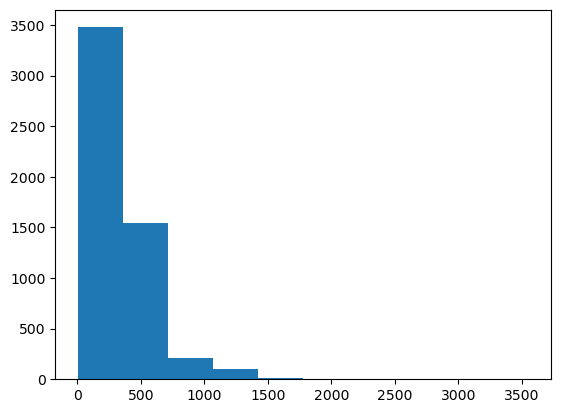

In [11]:
plt.hist(len_Aseq)

In [19]:
def seq_clip(seq, target_length=800):
    
    if len(seq) <= target_length:
        subseq = seq + "#" * (target_length - len(seq))
        return subseq
    else:
        seq = [(i, seq[i]) for i in range(len(seq))]
        subseq = random.sample(seq, target_length)
        subseq = sorted(subseq, key=lambda x:x[0])
        subseq = "".join([subseq[i][1] for i in range(len(subseq))])
        # subseq = ""
        # for i in range(len(seq)):
        #     if random.random() <= target_length/len(seq):
        #         subseq += seq[i]
        return subseq
    
    
a = "abcdefghijkl"

seq_clip(a, 5)

'cefgl'

sequence/structure alignment to select antigen
- biopython
    - pairwise aligner

epitope detection for binding site


distance for pre-processing multiple antigen chains
- biopython
    - distance selecter

In [ ]:
defgh, cdefg

In [12]:
threshold = 1000

t = 0
for i in range(len(len_Aseq)):
    if len_Aseq[i]>threshold:
        t += 1
print("longer than {}: {}".format(threshold, t))

longer than 1000: 136


In [29]:
dict_data[0].keys()

dict_keys(['pdb', 'Hchain', 'Lchain', 'Achain', 'Hseq', 'Lseq', 'Aseq', 'L1', 'L2', 'L3', 'H1', 'H2', 'H3', 'Hpos', 'Lpos', 'Apos'])

In [34]:
for i in range(len(dict_data)):
    if dict_data[i]["pdb"]=="5w08":
        break

In [36]:
dict_data[i]["Aseq"]

['TNATELVQNSSIGEICDSPHQILDGENCTLIDALLGDPQCDGFQNKKWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWNGVTQNGTSSACIRRSNNSFFSRLNWLTHLNFKYPALNVTMPNNEQFDKLYIWGVHHPVTDKDQIFLYAQPSGRITVSTKRSQQAVIPNIGFRPRIRNIPSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCKSECITPNGSIPNDKPFQNVNRITYGACPRYVKQSTLKLATGGALEVLFQ']

In [40]:
len(dict_data[i]["Aseq"][0])

291

In [42]:
AA_abbr_alias = {
    "MSE": "M",    # abbr of MET
    "FTR": "W",    # a type of TRP
    "OAS": "S",    # a type of SER
    "TYS": "Y",    # a type of TYR
    "TPO": "T",    # a typr of THR
    
}

d = {}
for k in AA_abbr_alias.keys():
    d[AA_abbr_alias[k]] = k
d

{'M': 'MSE', 'W': 'FTR', 'S': 'OAS', 'Y': 'TYS', 'T': 'TPO'}

In [39]:
len(dict_data[i]["Apos"][0])

272

In [33]:
cnt = 0
for i in range(len(dict_data)):
    if len(dict_data[i]["Aseq"][0])!=len(dict_data[i]["Apos"][0]):
        print(dict_data[i]["pdb"])
        cnt += 1
print(cnt)

4o51
5w08
7lg6
7t6s
5mi0
2ny3
4yo0
3qa3
6x1t
7mxl
6hga
6wj1
3dvn
6mph
2vxs
6oor
7v4w
5bk2
5hys
6x87
7rgp
2ny0
7rlw
6vi0
7um3
6myy
7t4r
6xox
6bdz
6qb3
7dc8
7yqz
7rda
4f9p
7v23
6glw
4j8r
6mto
4ydv
7lja
3x3f
7p02
5vxr
6okm
2r56
5x2o
7s0x
6cde
5e2w
5dup
4hc1
4lmq
7t9b
5dsc
6wxl
3mlt
4ffv
3ulu
6w51
3kj6
5kov
6cde
6xsk
6rp8
6awo
8err
6pzw
7s0x
6kva
6x5b
4qhu
6nqd
1ggi
4ypg
6x3x
6mfp
4xx1
7urc
6nms
4cad
4yr6
3q3g
2ht2
3opz
2b1h
7xav
6vel
5lbs
6s3t
7pc2
3vi3
7lue
6mhg
6opo
5drz
5x0t
6mhg
3ks0
7fci
6v4n
8d5c
6d0u
2vwe
7x38
6wxl
7vgy
6h3t
7ty0
7luc
6xp6
7rew
1zea
6q18
5ibl
7yu3
7mdj
5cus
3eob
4ffw
7mly
3nid
3sge
6nf5
6xbk
1sy6
4ut6
8dpg
7yhk
1xct
6mb3
7lo7
6uye
7ure
6z7y
7ue0
5mhr
3iu3
5drz
3ifp
5myk
4xgz
4rau
7z3a
7ew5
7eo4
7zwf
6o9h
7vux
6x1v
2h2p
7rbt
5cws
6wo5
6bf4
4f15
4dn4
7v05
7ly9
6cf2
6x9r
3wih
4yhp
7lex
8dpi
7jkt
6b3m
5ebl
4mqx
7tjq
7amr
7xst
7txz
5ebw
7c88
7cu4
6db5
4f9l
7m8l
5u7o
3uc0
6um7
3iu3
4m1c
5npi
6cde
6wty
4rau
4m5z
2fr4
1jps
1lk3
8err
4hj0
3ejz
2h2s
3csy
5nh3
3fku
7e9g
6rcv


In [10]:
keys = [dict_data[i]["pdb"] for i in range(len(dict_data))]

def countElement(sample_list, element):
    return sample_list.count(element)

non_repeated = 0
for i in range(len(keys)):
    element = keys[i]
    t = countElement(keys, element)
    print('{} has occurred {} times'.format(element, t))
    
    if t==1:
        non_repeated += 1
non_repeated

7t17 has occurred 2 times
7t17 has occurred 2 times
4o51 has occurred 4 times
5w08 has occurred 6 times
7lg6 has occurred 6 times
7t6s has occurred 1 times
5mi0 has occurred 1 times
2ny3 has occurred 1 times
4yo0 has occurred 2 times
7ugq has occurred 6 times
3qa3 has occurred 4 times
6x1t has occurred 6 times
1nca has occurred 1 times
4ypg has occurred 2 times
7mxl has occurred 3 times
6hga has occurred 1 times
6wj1 has occurred 3 times
3dvn has occurred 2 times
6mph has occurred 9 times
2vxs has occurred 4 times
6oor has occurred 1 times
7v4w has occurred 1 times
5bk2 has occurred 2 times
7bh8 has occurred 2 times
5hys has occurred 4 times
6x87 has occurred 7 times
7rgp has occurred 1 times
6o2b has occurred 4 times
2ny0 has occurred 1 times
7rlw has occurred 2 times
6vi0 has occurred 3 times
7um3 has occurred 2 times
6myy has occurred 3 times
7t4r has occurred 4 times
6xox has occurred 1 times
6bdz has occurred 1 times
6qb3 has occurred 1 times
7dc8 has occurred 2 times
7yqz has occ

7lcv has occurred 1 times
5c0n has occurred 2 times
7lk4 has occurred 4 times
1g7h has occurred 1 times
7t4g has occurred 3 times
1r3l has occurred 1 times
2xqb has occurred 1 times
6udj has occurred 6 times
7lf2 has occurred 6 times
3ab0 has occurred 2 times
7rd5 has occurred 2 times
5wt9 has occurred 1 times
5mv3 has occurred 8 times
4ydl has occurred 2 times
3fku has occurred 6 times
6ii9 has occurred 3 times
7bh8 has occurred 2 times
6n5d has occurred 3 times
4dqo has occurred 1 times
6i04 has occurred 2 times
4wfh has occurred 2 times
7lg6 has occurred 6 times
6nfu has occurred 1 times
8dua has occurred 3 times
7s8n has occurred 1 times
7lkg has occurred 2 times
4bh8 has occurred 1 times
7v3h has occurred 3 times
7kde has occurred 6 times
4k9e has occurred 1 times
6hxw has occurred 2 times
6xjy has occurred 2 times
5kaq has occurred 3 times
2bob has occurred 1 times
7rco has occurred 2 times
5yoy has occurred 6 times
3b2u has occurred 8 times
3sge has occurred 2 times
6r8x has occ

6bfs has occurred 1 times
6uyd has occurred 2 times
5bk2 has occurred 2 times
6bzu has occurred 4 times
6lht has occurred 1 times
6ot1 has occurred 9 times
4h0h has occurred 1 times
7s8h has occurred 2 times
5tzu has occurred 1 times
6kn9 has occurred 3 times
4zff has occurred 2 times
6gff has occurred 2 times
7m8l has occurred 6 times
5jw4 has occurred 6 times
4z7q has occurred 2 times
5wdf has occurred 2 times
6pdr has occurred 1 times
2j5l has occurred 1 times
3lhp has occurred 2 times
4lcu has occurred 1 times
7v05 has occurred 14 times
5aaw has occurred 6 times
2vxs has occurred 4 times
4tnw has occurred 10 times
6nfc has occurred 4 times
7mly has occurred 4 times
7lg6 has occurred 6 times
3hi6 has occurred 2 times
6dca has occurred 4 times
7myz has occurred 2 times
6pef has occurred 2 times
6ww5 has occurred 2 times
5w1m has occurred 4 times
7ugq has occurred 6 times
6nf5 has occurred 6 times
7cu5 has occurred 2 times
4r2g has occurred 4 times
6tys has occurred 3 times
8dph has o

6n16 has occurred 4 times
4tnv has occurred 10 times
1k4d has occurred 1 times
6m3b has occurred 1 times
6vep has occurred 4 times
7jix has occurred 1 times
5t5n has occurred 5 times
6opp has occurred 3 times
6x3x has occurred 2 times
4lu5 has occurred 2 times
5hdb has occurred 2 times
3q3g has occurred 4 times
7urd has occurred 1 times
4lsp has occurred 1 times
2jix has occurred 3 times
5w1m has occurred 4 times
6wdt has occurred 1 times
4z5r has occurred 8 times
2fx7 has occurred 1 times
2otu has occurred 4 times
6x96 has occurred 3 times
4ywg has occurred 2 times
4rfn has occurred 2 times
6cwd has occurred 4 times
6h3t has occurred 2 times
7mnl has occurred 2 times
5f9o has occurred 1 times
6xlq has occurred 4 times
4kxz has occurred 4 times
6id4 has occurred 2 times
6hig has occurred 1 times
6pbv has occurred 2 times
1tzg has occurred 2 times
1ott has occurred 2 times
7x6o has occurred 3 times
4utb has occurred 2 times
6p4b has occurred 2 times
3ria has occurred 5 times
6apb has oc

4kkb has occurred 2 times
6x8p has occurred 1 times
7tl0 has occurred 6 times
2w0f has occurred 1 times
5y9f has occurred 10 times
5vta has occurred 4 times
8dtt has occurred 2 times
3hr5 has occurred 4 times
1q1j has occurred 2 times
6k68 has occurred 4 times
6wtu has occurred 4 times
7a3o has occurred 1 times
7nwl has occurred 1 times
6mb3 has occurred 9 times
7lok has occurred 2 times
7tjq has occurred 6 times
6pzz has occurred 4 times
4xp9 has occurred 1 times
7rfb has occurred 2 times
5d1q has occurred 2 times
4rwy has occurred 1 times
6cyf has occurred 4 times
1mpa has occurred 1 times
5u5m has occurred 1 times
4tnv has occurred 10 times
6cwt has occurred 2 times
7ugn has occurred 6 times
6iap has occurred 2 times
4nik has occurred 1 times
3l5w has occurred 2 times
5ig7 has occurred 4 times
5vjq has occurred 4 times
6b5t has occurred 1 times
4uv7 has occurred 1 times
6pzw has occurred 4 times
6pis has occurred 2 times
4v1d has occurred 2 times
4ydv has occurred 2 times
7kmd has o

1657

In [9]:
import copy
data = copy.deepcopy(dict_data)
max_length = 1000

data_new = [] #copy.deepcopy(data)

for i in range(len(data)):

    # CDR sequence and position
    Hseq = data[i]["Hseq"][0]
    Lseq = data[i]["Lseq"][0]

    H1, H2, H3 = data[i]["H1"], data[i]["H2"], data[i]["H3"]
    L1, L2, L3 = data[i]["L1"], data[i]["L2"], data[i]["L3"]

    Hpos = data[i]["Hpos"]
    Lpos = data[i]["Lpos"]        

    Hmask, Hspan = get_mask(seq=Hseq, substrs=[data[i]["H1"], data[i]["H2"], data[i]["H3"]])
    Lmask, Lspan = get_mask(seq=Lseq, substrs=[data[i]["L1"], data[i]["L2"], data[i]["L3"]])

    # sanitisation through checking non-zero elements
    # for cdr in ["H1", "H2", "H3", "L1", "L2", "L3"]:
    if np.count_nonzero(Hmask) != len(data[i]["H1"])+len(data[i]["H2"])+len(data[i]["H3"]):
        print("Hcdr disalignment: {} at position {}".format(data[i]["pdb"], i))
        continue

    if np.count_nonzero(Lmask) != len(data[i]["L1"])+len(data[i]["L2"])+len(data[i]["L3"]):
        print("Lcdr disalignment: {} at position {}".format(data[i]["pdb"], i))
        continue

    Hpos_cdr = []
    for idx in range(3):
        Hpos_cdr.append(Hpos[Hspan[idx][0]:Hspan[idx][1]])
        if idx < 2:
            Hpos_cdr.append(np.zeros((4,3)))

    Lpos_cdr = []
    for idx in range(3):
        Lpos_cdr.append(Lpos[Lspan[idx][0]:Lspan[idx][1]])
        if idx < 2:
            Lpos_cdr.append(np.zeros((4,3)))

    pos = Hpos_cdr + [np.zeros((4,3))] + Lpos_cdr
    seq = H1 + "/" + H2 + "/" + H3 + "/" + L1 + "/" + L2 + "/" + L3


    # antigen sequence and position
    Aseq = "/".join(data[i]["Aseq"])    # SEP "/"
    Apos = [achain for achain in data[i]["Apos"]]

    # insert zeros as positions of "SEP" -- "/" for antigen chain
    if len(Apos)>1:
        Apos = [np.zeros((4,3)).astype(np.float32) if idx%2==0 else ele for idx,ele in enumerate(Apos)]
        Apos = Apos[:-1] if len(Apos)%2==0 else Apos
    Apos = Apos[0]
#     break

    # fix length antigen chain
    assert len(Aseq)==len(Apos), "length disalignment of seqeunce and position"
    # if len(Aseq)!=len(Apos[0]):
    #     print(len(Aseq), Aseq)
    #     print(len(Apos), Apos)

    if len(Aseq) > max_length:
        random.seed(42)
        Aseq = random.sample(Aseq, max_length)
        Apos = random.sample(Apos[0], max_length)


    # append to list
    data_new.append({"X":pos, "S":seq, "mask":[Hmask, Lmask], "AX":Apos, "AS":Aseq})

random.seed(42)
random.shuffle(data_new)

# train:val:test = 7:1:2
train, test = data_new[:int(0.8*len(data_new))], data_new[int(0.8*len(data_new)):]
train, val = train[:int(0.7*len(data_new))], train[int(0.7*len(data_new)):]

AssertionError: length disalignment of seqeunce and position

In [18]:
data[i]

{'pdb': '4o51',
 'Hchain': 'B',
 'Lchain': 'A',
 'Achain': ['N'],
 'Hseq': ['*SVEESGGRLVTPGTPLTLTCTVSGFSLSSYPMNWVRQAPGKGLEWIGGIGTSGNIWYASWAKGRFIISRASSTTVDLKVTSPTTEDTATYFCARGLYNDYTVWGPGTLVTVSSASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCHHHHHH'],
 'Lseq': ['*VLTQTPSSVSAAVGGTVTINCQASQSVYNKNYLAWYQQKPGQPPKRLIYSASTLASGVSSRFKGSGSGTQFTLTISDVQADDVATYYCLGSYDQAAHAFGGGTKVVVERTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGEC'],
 'Aseq': ['THTSPPSPAPELLG'],
 'L1': 'QSVYNKNY',
 'L2': 'SAS',
 'L3': 'LGSYDQAAHA',
 'H1': 'GFSLSSYP',
 'H2': 'IGTSGNI',
 'H3': 'ARGLYNDYTV',
 'Hpos': [array([[73.006, 23.145, -8.031],
         [72.484, 23.041, -9.384],
         [71.641, 21.777, -9.541],
         [71.823, 20.806, -8.804]], dtype=float32),
  array([[ 70.668,  21.844, -10.449],
         [ 69.848,  20.703, -10.828],
         [ 69.906,  20.483, -12.344],
         [ 70.315,  21.367, -13.093]], dtype=

In [17]:
[achain for achain in data[i]["Apos"]]

[[array([[49.747, 17.411,  5.857],
         [49.37 , 18.293,  4.764],
         [48.776, 19.579,  5.295],
         [48.005, 19.539,  6.249]], dtype=float32),
  array([[49.154, 20.706,  4.68 ],
         [50.175, 20.896,  3.659],
         [51.491, 21.359,  4.239],
         [51.563, 21.519,  5.443]], dtype=float32),
  array([[52.497, 21.59 ,  3.398],
         [53.811, 22.09 ,  3.812],
         [54.439, 22.935,  2.701],
         [53.956, 22.96 ,  1.59 ]], dtype=float32),
  array([[55.523, 23.632,  2.984],
         [56.138, 24.515,  2.001],
         [56.72 , 23.751,  0.837],
         [57.497, 22.851,  1.016]], dtype=float32),
  array([[56.343, 24.135, -0.362],
         [56.765, 23.421, -1.568],
         [57.57 , 24.328, -2.507],
         [58.376, 23.855, -3.31 ]], dtype=float32),
  array([[57.322, 25.632, -2.402],
         [57.999, 26.647, -3.187],
         [59.301, 27.105, -2.557],
         [59.541, 26.917, -1.366]], dtype=float32)]]

In [10]:
len(Aseq)

14

In [13]:
Aseq

'THTSPPSPAPELLG'

In [15]:
len(Apos)

6

In [16]:
assert len(Aseq)==len(Apos)

AssertionError: 

In [11]:
train, val, test = process(data=dict_data)

Hcdr disalignment: 6t9e at position 1064
Hcdr disalignment: 6ss6 at position 1359
Hcdr disalignment: 6yax at position 1687
Hcdr disalignment: 6ss6 at position 1942
Hcdr disalignment: 6t9d at position 2091
Hcdr disalignment: 7d3r at position 2169
Hcdr disalignment: 6t9e at position 2489
Hcdr disalignment: 7lf7 at position 2595
Hcdr disalignment: 7lki at position 2913
Hcdr disalignment: 6ss4 at position 2938
Hcdr disalignment: 6yax at position 2951
Hcdr disalignment: 7d3m at position 3234
Hcdr disalignment: 6yxm at position 3337
Hcdr disalignment: 8dvd at position 3438
Hcdr disalignment: 6vtt at position 3577
Hcdr disalignment: 7ssv at position 4085
Hcdr disalignment: 7lki at position 4096
Hcdr disalignment: 7d3l at position 4159
Hcdr disalignment: 4y5y at position 4303
Hcdr disalignment: 8ekf at position 4547
Hcdr disalignment: 6ss6 at position 4661
Hcdr disalignment: 4y5y at position 4803
Hcdr disalignment: 7r8u at position 4947
Hcdr disalignment: 6zjg at position 4955
Hcdr disalignmen

- 7t9b: why fault?
- 6t9e: wrong chain names in PDB file
- 6ss6: Hseq相比CDR多了个A

In [9]:
def get_mask(seq, substrs):
    # seq: [Hseq]
    # substrs: [H1, H2, H3]
    # return [mask_H1, mask_H2, mask_H3]
    mask = [0] * len(seq)
    m = 1
    span = []
    for substr in substrs:
        if len(span)==0:
            start = seq.find(substr)
            end = start+len(substr)
        else:
            start = seq.find(substr, span[-1][-1], -1)
            end = start+len(substr)
        span.append((start, end))
        for idx in range(len(mask)):
            if idx>=start and idx<end:
                mask[idx] = m
        m += 1
    
    return mask, span

for i in range(len(dict_data)):
    if dict_data[i]["pdb"]=="6t9e":
        break

Hseq = dict_data[i]["Hseq"][0]
Lseq = dict_data[i]["Lseq"][0]

H1 = dict_data[i]["H1"]
H2 = dict_data[i]["H2"]
H3 = dict_data[i]["H3"]
L1 = dict_data[i]["L1"]
L2 = dict_data[i]["L2"]
L3 = dict_data[i]["L3"]

lm, ls = get_mask(seq=Lseq, substrs=[L1, L2, L3])
hm, hs = get_mask(seq=Hseq, substrs=[H1, H2, H3])

# print("Lseq ")
# print(Lseq)
# print()
# print("L1, L2, L3")
# print(L1, L2, L3)

# "".join(list(map(str, lm)))

print("Hseq ")
print(Hseq)
print()
print("H1, H2, H3")
print(H1, H2, H3)

"".join(list(map(str, hm)))

Hseq 
LQLVESGGGLVKGGSLRLSCAADGWFGYTDMSWVRQPGKGLEWVGSISKGGSTYYNTKFIRFTISRDDDTNTYLQMNSLRAEDTVYYCARDDGYFDWGQGTLVTVSSATKGPSVFPLAPSKSTSGGTAALGCVKDYFPEPVTVSNSGALTSGVHTFAVLQSSGLYSLSVVTVPSSSLGTKYICNVNHKPSNTVDKKVEPKSCT

H1, H2, H3
GWWFGYTD ISYKGGST ARDDGYFDT


'33333333000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'

In [47]:
for i in "ATGYS":
    print(to_abbr(i), sep=" ")

ALA
THR
GLY
TYR
SER


In [27]:
np.count_nonzero(hm) != len(H1)+len(H2)+len(H3), np.count_nonzero(hm), len(H1)+len(H2)+len(H3)

(False, 34, 34)

In [21]:
np.count_nonzero(hm) != len(h1)+len(h2)+len(h3), np.count_nonzero(hm), len(h1)+len(h2)+len(h3)

(False, 34, 34)

In [12]:
np.count_nonzero(hm) != len(H1)+len(H2)+len(H3), np.count_nonzero(hm), len(H1)+len(H2)+len(H3)

(True, 33, 34)

In [50]:
dict_data[i]["Hchain"], dict_data[i]["Lchain"]

('E', 'F')

In [88]:
np.count_nonzero(lm) != len(L1)+len(L2)+len(L3), np.count_nonzero(lm), len(L1)+len(L2)+len(L3)

(False, 22, 22)

In [77]:
len("QSALTQPPSASGSPGQTVTISCTGT"), len("0000000000000000000000000")

(25, 25)

In [9]:
train[0].keys()

dict_keys(['X', 'S', 'mask'])

In [10]:
train[0]["mask"]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [12]:
train[0]["S"]

'GFSLTGYG/IWGDGNT/ARERDYRLDY/GNIHNY/YTT/QHFWSTPRT'

In [13]:
train[0]["X"]

[[array([[ 49.935, -13.272, -21.092],
         [ 50.963, -12.82 , -20.163],
         [ 50.741, -13.184, -18.701],
         [ 51.561, -12.813, -17.865]], dtype=float32),
  array([[ 49.637, -13.87 , -18.381],
         [ 49.321, -14.296, -17.011],
         [ 48.265, -15.407, -17.067],
         [ 47.606, -15.586, -18.102]], dtype=float32),
  array([[ 48.1  , -16.136, -15.961],
         [ 47.115, -17.22 , -15.854],
         [ 45.803, -16.733, -15.201],
         [ 45.835, -16.047, -14.173]], dtype=float32),
  array([[ 44.665, -17.085, -15.797],
         [ 43.362, -16.688, -15.261],
         [ 43.068, -17.318, -13.894],
         [ 42.196, -16.844, -13.156]], dtype=float32),
  array([[ 43.801, -18.371, -13.532],
         [ 43.6  , -19.015, -12.227],
         [ 44.134, -18.175, -11.052],
         [ 43.684, -18.349,  -9.908]], dtype=float32),
  array([[ 45.062, -17.253, -11.326],
         [ 45.635, -16.444, -10.259],
         [ 45.186, -14.996, -10.114],
         [ 45.635, -14.307,  -9.188]], dt

In [18]:
len(train[0]["X"]), len(train[0]["S"]), len(train[0]["AX"][0]), len(train[0]["AS"])

(11, 48, 129, 129)

In [19]:
len(train), len(val), len(test)

(475, 69, 136)